In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from mini_yolov3.model import MiniYOLOV3
from mini_yolov3.trainer import Trainer
import torch
from torchvision.transforms import v2
from mini_yolov3.dataset import SVHNDataset, collate_fn
from torch.utils.data import Subset, DataLoader
from mini_yolov3.loss import YOLOLoss, build_targets
import matplotlib.pyplot as plt
from mini_yolov3.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from mini_yolov3.model_output import YoloV3Output

In [50]:
train_dataset = SVHNDataset(split="train", image_transform=v2.Compose([
                        v2.ToTensor(),
                        v2.Resize((32, 32))  
                      ]))
# train_dataset = Subset(train_dataset, range(12, 13))
train_dataset = Subset(train_dataset, range(0, 2))

/Users/ericchen/Library/Caches/pypoetry/virtualenvs/mini-yolov3-a3VRlvzj-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [51]:
train_dataset[0]["bbox"]

tensor([[0.3551, 0.0217, 0.1963, 0.8696],
        [0.5327, 0.0652, 0.1495, 0.8696]])

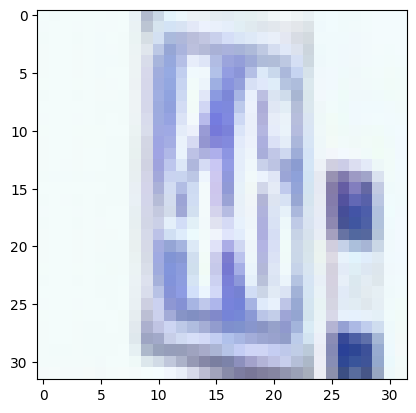

In [52]:
plt.imshow(train_dataset[0]["image"].permute(1, 2, 0))

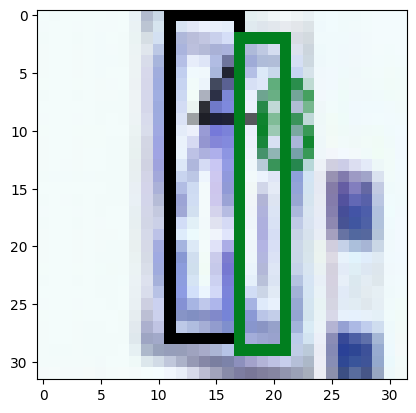

In [53]:
plt.imshow(
    draw_bounding_boxes(train_dataset[0]["image"], box_convert(train_dataset[0]["bbox"], "xywh", "xyxy"), train_dataset[0]["labels"])
)

In [54]:
dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

In [55]:
for batch in dataloader:
    print(batch["bboxes"])
    print(box_convert(batch["bboxes"][0], "xywh", "cxcywh"))
    targets = build_targets(batch["bboxes"], batch["labels"], (2, 2), anchors, 10)

[tensor([[0.3551, 0.0217, 0.1963, 0.8696],
        [0.5327, 0.0652, 0.1495, 0.8696]]), tensor([[0.3443, 0.1290, 0.1967, 0.7419],
        [0.5082, 0.1613, 0.1639, 0.7419]])]
tensor([[0.4533, 0.4565, 0.1963, 0.8696],
        [0.6075, 0.5000, 0.1495, 0.8696]])


NameError: name 'anchors' is not defined

In [56]:
batch["images"].shape

torch.Size([2, 3, 32, 32])

In [57]:
targets[0, 0, 0, :], targets[0, 1, 1, :]

NameError: name 'targets' is not defined

In [58]:
import json

In [59]:
torch.manual_seed(0)

config = json.load(open("./configs/smol.json", "r"))
model = MiniYOLOV3.from_config(config)

trainer = Trainer(
    model=model,
    train_dataset=train_dataset,
    num_epochs=5000,
    lr=3e-4,
    lambda_coord=1,
    lambda_noobj=1,
    device="cpu"
)

[loading model from config...]


In [60]:
trainer.train()

100%|██████████| 5000/5000 [00:53<00:00, 93.57it/s, class_loss=0.000504, coord_loss=8.94e-6, loss=0.05, noobj_loss=0.03, obj_conf_loss=0.0195]     


[48.712257385253906,
 46.332340240478516,
 44.06553268432617,
 41.995391845703125,
 43.09901809692383,
 46.7801628112793,
 46.27302932739258,
 45.7276611328125,
 45.166385650634766,
 44.630836486816406,
 44.10969924926758,
 43.57534408569336,
 40.704551696777344,
 40.16546630859375,
 39.57219314575195,
 38.94099426269531,
 38.294010162353516,
 37.627925872802734,
 36.918434143066406,
 36.124507904052734,
 35.28335189819336,
 34.423423767089844,
 33.557613372802734,
 32.73460388183594,
 31.948829650878906,
 31.202878952026367,
 30.503074645996094,
 29.848045349121094,
 29.200578689575195,
 28.57583236694336,
 27.97881507873535,
 38.741111755371094,
 26.92310333251953,
 26.451297760009766,
 26.601713180541992,
 26.166278839111328,
 25.741920471191406,
 25.32095718383789,
 24.911462783813477,
 24.51609992980957,
 24.13722038269043,
 23.772417068481445,
 23.413301467895508,
 23.065570831298828,
 22.730302810668945,
 22.406936645507812,
 22.097393035888672,
 21.80011558532715,
 21.516304016

In [61]:
pred = model(batch["images"])
pred.shape

torch.Size([2, 8, 8, 60])

In [62]:
pred[0, 0, 0, :], pred[0, 1, 1, :]

(tensor([-0.0123,  0.0741,  0.0884, -0.4184, -4.2352, -0.6639,  0.0204, -0.5110,
         -0.3236, -0.3839, -0.2605,  0.0323, -0.5000,  0.0396, -0.4594, -0.1960,
         -0.1405, -0.3086,  0.0405, -0.0537,  0.0113, -0.1671, -0.1082,  0.2284,
          0.0718, -0.1983, -0.0877,  0.3681,  0.1664, -0.0806, -0.1357,  0.9476,
         -0.2041,  0.0780, -0.0220, -0.6469,  0.3647,  0.3201,  0.1491,  0.1758,
          0.3725,  0.1664,  0.7586, -0.0124, -0.2334, -0.1251,  0.2063, -0.3283,
          0.1164,  0.0137, -0.2403,  0.0406, -0.0121,  0.3714, -0.5672,  0.2996,
          0.1601, -0.0098, -0.2256, -0.1538], grad_fn=<SliceBackward0>),
 tensor([ 5.4492e-01,  1.1101e+00,  3.3642e-01, -5.8042e-01, -1.0230e+01,
         -1.9260e+00, -7.3726e-01, -1.8317e+00, -1.3784e+00,  3.9740e-01,
         -1.6050e+00, -3.1445e-01, -1.8274e+00, -3.5049e-01, -1.7715e+00,
         -4.8611e-01, -4.6138e-01, -3.7450e-01,  3.4729e-01, -1.6556e-01,
         -6.1444e-01, -6.2003e-01, -2.9447e-01,  2.0312e-01, -4.

In [76]:
output = YoloV3Output(pred, model.anchors, 10)

In [82]:
bounding_boxes = output.bounding_boxes(0.97)

In [83]:
bounding_boxes

[{'bboxes': tensor([[ 0.3870, -0.0416,  0.1331,  1.0212]]),
  'confidence': tensor([3.8813]),
  'labels': tensor([4])},
 {'bboxes': tensor([[0.3443, 0.1290, 0.1967, 0.7420],
          [0.5082, 0.1610, 0.1639, 0.7424]]),
  'confidence': tensor([10.0578,  4.3987]),
  'labels': tensor([7, 1])}]

In [87]:
i = 1

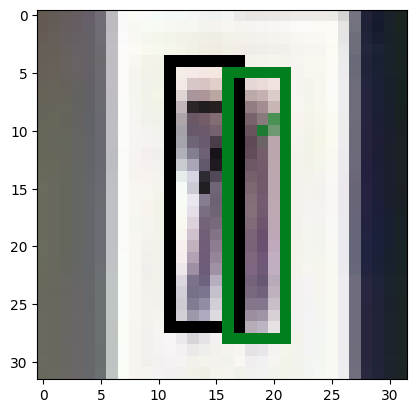

In [88]:
plt.imshow(
    draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "xywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
)
)

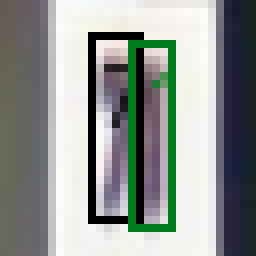

In [89]:
draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "xywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
).resize((256, 256), 0)